In [2]:
#!pip install catboost
#!pip install xgboost

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots


## Import các modules và hàm từ thư viện scikit-learn
1.   train_test_split: Dùng để chia dữ liệu thành tập huấn luyện và tập kiểm tra.
2.   accuracy_score: Đánh giá độ chính xác cho bài toán phân loại.
3.   mean_squared_error, mean_squared_log_error: Đánh giá hiệu suất cho bài toán regression.
4.   RandomizedSearchCV: Sử dụng để tìm kiếm siêu tham số trong một không gian tham số.
5.   make_scorer: Tạo một hàm đánh giá được tùy chỉnh.
6.   FunctionTransformer: Áp dụng các hàm biến đổi tùy chỉnh cho dữ liệu.
7.   RandomForestRegressor, GradientBoostingRegressor: Mô hình học máy sử dụng trong bài toán regression.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Import các thư viện machine learning khác
1.   xgboost: Thư viện gradient boosting hiệu suất cao.
2.   CatBoostRegressor: Thư viện gradient boosting có khả năng tự xử lý dữ liệu hạng mục.
3.   RandomForestRegressor: Mô hình RandomForest cho bài toán regression.

In [5]:
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

## Đọc Dữ liệu
Sau khi thực hiện dòng mã này, bạn sẽ có hai biến train và test là hai DataFrame chứa dữ liệu từ tập huấn luyện và tập kiểm tra tương ứng. Đối tượng DataFrame trong pandas là một biểu diễn mạnh mẽ cho dữ liệu dạng bảng với nhiều tính năng hữu ích để thực hiện các phép xử lý và phân tích dữ liệu.

In [7]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

train.insert(0, 'id', range(1, len(train) + 1))
test.insert(0, 'id', range(1, len(test) + 1))

## Trực Quan Bảng

Dòng mã train.head() được sử dụng để hiển thị năm dòng đầu tiên của DataFrame train. Phương thức head() trong pandas được sử dụng để xem các hàng đầu tiên của DataFrame, giúp ta nhanh chóng có cái nhìn tổng quan về dữ liệu. Dưới đây là một ví dụ về cách dòng mã này hoạt động

In [8]:
train.head()
train.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

Dòng mã train.describe() được sử dụng để tạo một bảng thống kê mô tả của DataFrame train. Phương thức describe() trong pandas cung cấp các thống kê tổng quan về các đặc trưng số của dữ liệu như số lượng, trung bình, phương sai, giá trị tối thiểu, giá trị tối đa và các phần centile khác.

In [9]:
train.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000
mean,25682.000000,6.531792,3.091194,2.538111,0.832019,2.199424,13.805512,0.558437,0.351148,18.856550,27979.153593,0.612367,0.353776,0.588011,0.588011,0.561825,99.327064
std,14827.365275,3.464902,0.827293,1.489316,1.303775,1.109080,4.622431,0.496578,0.477334,10.263746,5701.145280,0.487215,0.478145,0.492198,0.492198,0.496168,30.023458
min,1.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,12841.500000,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,25682.000000,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,38522.500000,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,51363.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [13]:
test.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000,9065.000000
mean,4533.000000,6.593380,3.104357,2.509873,0.814231,2.205074,13.811654,0.559956,0.346387,18.884170,28041.307446,0.614231,0.356315,0.587645,0.587645,0.567016
std,2616.984429,3.452237,0.829806,1.494819,1.301400,1.112879,4.624430,0.496420,0.475845,10.229625,5700.350448,0.486803,0.478936,0.492286,0.492286,0.495516
min,1.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2267.000000,3.880000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4533.000000,5.970000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6799.000000,8.790000,4.000000,4.000000,1.000000,3.000000,17.800000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9065.000000,19.750000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Rút Đặc Trưng
Dòng mã này thực hiện việc tách dữ liệu thành các đặc trưng (features) và biến mục tiêu (target variable) cũng như hiển thị kích thước.

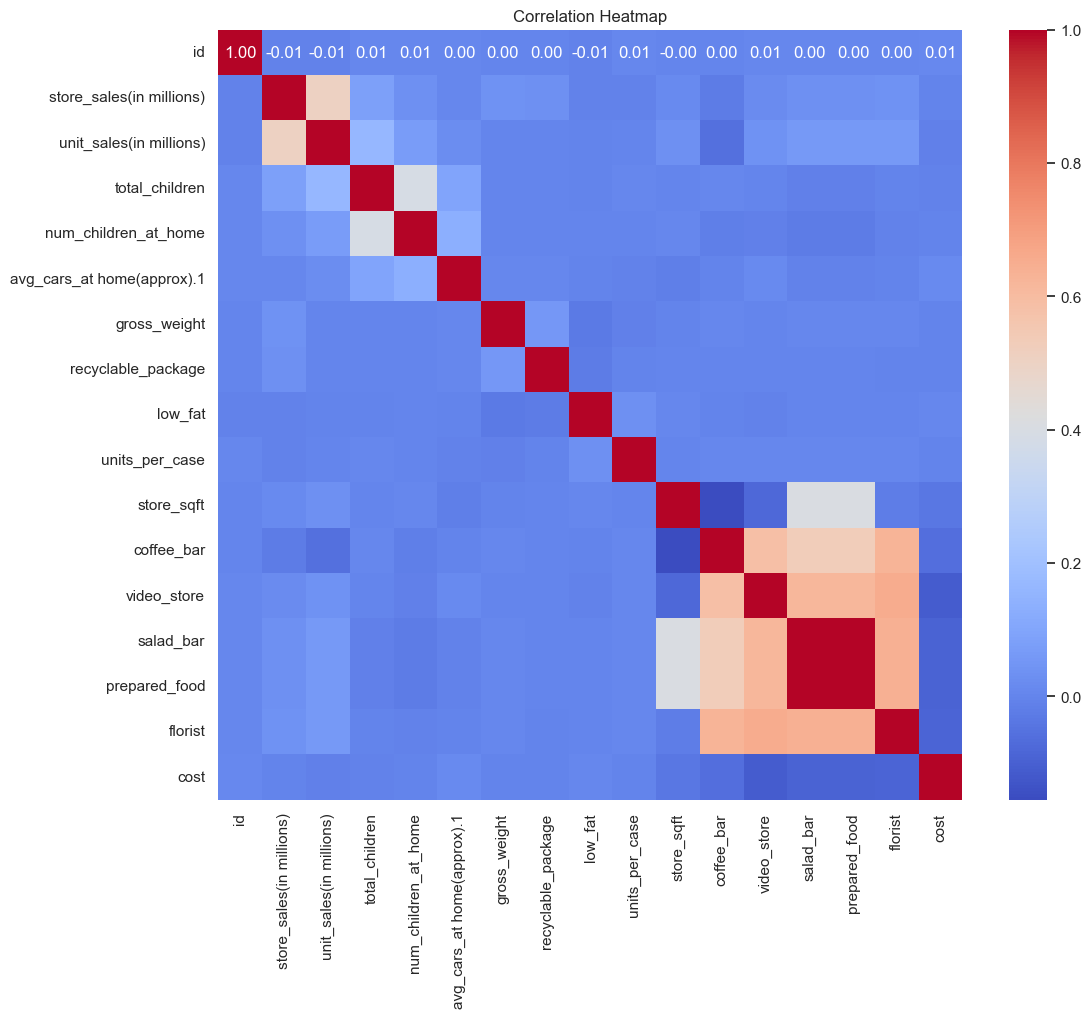

In [12]:
sns.set()

corr_matrix = train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Extract features (X) by excluding the last column
X = train.iloc[:, :-1]
# Extract the target variable (Y) as the last column
Y = train.iloc[:, -1]

X.shape, Y.shape

((51363, 16), (51363,))

##Sử dụng mô hình GradientBoostingRegressor
Đoạn mã này sử dụng mô hình GradientBoostingRegressor từ thư viện scikit-learn để đào tạo mô hình và sau đó trích xuất các đặc trưng quan trọng.
1.  Tạo và Đào Tạo Mô Hình Gradient Boosting
2.  Trích Xuất Đặc Trưng Quan Trọng
gbm.feature_importances_: Thuộc tính của mô hình Gradient Boosting, cung cấp thông tin về độ quan trọng của từng đặc trưng.
3.  Chọn Top 8 Đặc Trưng Quan Trọng
  * pd.Series(importances_gbm, index=X.columns): Tạo một Series pandas với đặc trưng là giá trị quan trọng và chỉ số là tên của các đặc trưng.
  * .nlargest(8): Chọn 8 đặc trưng có giá trị quan trọng lớn nhất.
  * .index.tolist(): Chuyển đổi chỉ số thành danh sách, đưa ra tên của 8 đặc trưng quan trọng nhất.
4.  In Ra Các Đặc Trưng Quan Trọng

In [ ]:
gbm = GradientBoostingRegressor()
gbm.fit(X, Y)

importances_gbm = gbm.feature_importances_

top_features_gbm = pd.Series(importances_gbm, index=X.columns).nlargest(8).index.tolist()
print("Top 8 features from GradientBoostingRegressor:", top_features_gbm)

Top 8 features from GradientBoostingRegressor: ['store_sqft', 'video_store', 'id', 'total_children', 'avg_cars_at home(approx).1', 'store_sales(in millions)', 'prepared_food', 'num_children_at_home']


## Hàm preprocess(df) để tiền xử lý dữ liệu.
1.   most_important_features: Là một danh sách chứa tên của các đặc trưng quan trọng được chọn trước đó (từ mô hình Gradient Boosting).
2.   df = df.copy(): Tạo một bản sao của DataFrame để không làm thay đổi dữ liệu gốc.
3. df['store_sqft'] = df['store_sqft'].astype('category'): Chuyển cột 'store_sqft' thành kiểu dữ liệu categorical.
4. df['salad'] = (df['salad_bar'] + df['prepared_food']) / 2: Tạo một cột mới 'salad' bằng cách lấy giá trị trung bình của 'salad_bar' và 'prepared_food'.
5. df['log_cost'] = np.log1p(df['cost']): Tạo một cột mới 'log_cost' bằng cách áp dụng hàm log(1 + x) cho cột 'cost'.
6. return df: Trả về DataFrame đã được xử lý.

In [ ]:
most_important_features = ['store_sqft', 'video_store', 'total_children', 
                           'store_sales(in millions)', 'avg_cars_at home(approx).1', 
                           'salad_bar', 'gross_weight', 'num_children_at_home']

def preprocess(df):
    df = df.copy()
    df['store_sqft'] = df['store_sqft'].astype('category')
    df['salad'] = (df['salad_bar'] + df['prepared_food']) / 2

    if 'cost' in df.columns:
        df['log_cost'] = np.log1p(df['cost'])
    else:
        # If 'cost' is not present, you can handle it as needed
        print("Warning: 'cost' column not found. 'log_cost' will not be calculated.")
        df['log_cost'] = np.nan  # or any other value you prefer for missing log_cost
        
    return df
    


## Chia dữ liệu

Dòng mã này thực hiện quá trình tiền xử lý dữ liệu bằng cách gọi hàm preprocess(df) đã được định nghĩa trước đó và sau đó chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách sử dụng train_test_split từ scikit-learn.
1. train_test_split: Chia dữ liệu thành tập huấn luyện và tập kiểm tra.
2. train_data[most_important_features]: Chọn chỉ các đặc trưng quan trọng từ tập dữ liệu đã được tiền xử lý.
3. train_data["log_cost"]: Chọn biến mục tiêu (logarithm của chi phí).
test_size=0.2: Chia dữ liệu thành 80% tập huấn luyện và 20% tập kiểm tra.
4. random_state=2022: Cung cấp một số ngẫu nhiên để đảm bảo sự tái tái tạo của quá trình chia dữ liệu.

In [ ]:
train_data = preprocess(train)
X_train, X_test, y_train, y_test = train_test_split(train_data[most_important_features], train_data["log_cost"], test_size=0.2, random_state=2022)

## Config mô hình
1. n_estimators: Số lượng cây trong mô hình.
2. learning_rate: Tỉ lệ học của mô hình.
3. max_depth: Độ sâu tối đa của mỗi cây.
4. subsample: Tỉ lệ mẫu được sử dụng để đào tạo mỗi cây.
5. colsample_bytree: Tỉ lệ số cột được sử dụng để đào tạo mỗi cây.
6. tree_method: Phương pháp xây dựng cây, trong trường hợp này là 'hist' để sử dụng histogram-based method.
7. enable_categorical: Cho phép xử lý biến hạng mục.
8. verbosity: Mức độ chi tiết của quá trình đào tạo (1 là thông thường).
9. min_child_weight: Trọng số tối thiểu của mỗi lá cây.
10. base_score: Giá trị dự đoán ban đầu của tất cả các mẫu.
11. random_state: Seed cho các phép toán ngẫu nhiên, đảm bảo tái tái tạo.

In [ ]:
xgb_params = {'n_estimators': 280,
              'learning_rate': 0.05,
              'max_depth': 10,
              'subsample': 1.0,
              'colsample_bytree': 1.0,
              'tree_method': 'hist',
              'enable_categorical': True,
              'verbosity': 1,
              'min_child_weight': 3,
              'base_score': 4.6,
              'random_state': 2023}
# Tạo một đối tượng mô hình XGBRegressor với các tham số được định nghĩa trong xgb_params.
model = xgb.XGBRegressor(**xgb_params)
# Huấn luyện mô hình trên tập dữ liệu huấn luyện X_train với biến mục tiêu y_train.
model.fit(X_train, y_train)

XGBRegressor(base_score=4.6, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=280, n_jobs=None,
             num_parallel_tree=None, random_state=2023, ...)

## Đánh giá hiệu xuất mô hình
Dòng mã này sử dụng mô hình đã được đào tạo để thực hiện dự đoán trên tập kiểm tra và đánh giá hiệu suất của mô hình bằng cách tính Root Mean Squared Error (RMSE).
1. model.predict(X_test): Sử dụng mô hình để dự đoán giá trị trên tập dữ liệu kiểm tra X_test.
2. mean_squared_error(y_test, y_pred, squared=False): Tính toán Root Mean Squared Error (RMSE) giữa giá trị thực tế y_test và giá trị dự đoán y_pred.
squared=False: Đảm bảo rằng hàm mean_squared_error trả về giá trị RMSE thay vì MSE.
3. Hiển thị giá trị RMSE đã tính được cho mô hình XGBoost trên tập kiểm tra.
Kết quả RMSE là một phép đo đánh giá độ chính xác của mô hình trên tập kiểm tra, trong đó giá trị càng thấp càng tốt.

In [ ]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error for XGBoost: {mse:.2f}")

Root Mean Squared Error for XGBoost: 0.31


Dòng mã này tạo và đào tạo một mô hình RandomForestRegressor với các tham số được định nghĩa trong rf_params và sau đó đánh giá hiệu suất của mô hình trên tập kiểm tra bằng cách tính Root Mean Squared Error (RMSE).


### Formula for Prediction (Regression Task):

Đối với một vectơ đặc trưng đầu vào $X$, dự đoán $Y_{\text{pred}}$ được lấy bằng cách tìm tổng trung bình của tất cả dự đoán

$$Y_{\text{pred}} = \frac{1}{N} \sum_{i=1}^{N} Y_{i} $$

- $N$: số cây
- $Y_{i}$: kết quả của $i$-th tree.


In [ ]:

# RandomForestRegressor
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': 2023
}

rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Mean Squared Error for rf: {mse:.2f}")


Mean Squared Error for rf: 0.31


Dòng mã này tạo và đào tạo một mô hình GradientBoostingRegressor với các tham số được định nghĩa trong gb_params và sau đó đánh giá hiệu suất của mô hình trên tập kiểm tra bằng cách tính Root Mean Squared Error (RMSE).

In [ ]:
# GradientBoostingRegressor
gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 2023
}

gb_model = GradientBoostingRegressor(**gb_params)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f"Mean Squared Error for gb: {mse:.2f}")

Mean Squared Error for gb: 0.31


Hàm preprocessTest(df) được định nghĩa để tiền xử lý dữ liệu trên tập kiểm tra (hoặc dữ liệu mới) tương tự như hàm preprocess(df) đã được đề cập trước đó.

In [ ]:
def preprocessTest(df):
    df = df.copy()
    df['store_sqft'] = df['store_sqft'].astype('category')
    df['salad'] = (df['salad_bar'] + df['prepared_food']) / 2
    return df

Dòng mã này sử dụng hàm preprocessTest để tiền xử lý dữ liệu trên tập kiểm tra (biến test) và sau đó sử dụng mô hình RandomForestRegressor đã được đào tạo (rf_model) để dự đoán giá trị trên tập kiểm tra.

In [ ]:
test_data = preprocessTest(test)
y_pred_test = model.predict(test_data[most_important_features])

Dòng mã này tạo một Series pandas mới (cost) chứa giá trị dự đoán (y_pred_test) và sau đó thêm cột 'cost' vào DataFrame test_data sau khi chuyển đổi giá trị dự đoán về dạng gốc bằng hàm np.expm1

In [ ]:
cost = pd.Series(y_pred_test, name='cost')
test_data['cost'] = np.expm1(y_pred_test)
test_data.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,salad,cost
0,1,2.65,5.0,4.0,1.0,4.0,6.89,0.0,1.0,5.0,33858.0,1.0,0.0,1.0,1.0,1.0,1.0,92.845367
1,2,8.34,3.0,0.0,0.0,1.0,9.71,1.0,1.0,28.0,20319.0,0.0,0.0,0.0,0.0,0.0,0.0,102.899002
2,3,3.54,2.0,4.0,0.0,2.0,20.90,1.0,0.0,15.0,30797.0,1.0,1.0,1.0,1.0,1.0,1.0,86.913734
3,4,5.60,2.0,3.0,2.0,2.0,11.00,1.0,0.0,33.0,20319.0,0.0,0.0,0.0,0.0,0.0,0.0,98.484589
4,5,4.80,3.0,2.0,0.0,4.0,17.40,1.0,0.0,36.0,30268.0,0.0,0.0,0.0,0.0,0.0,0.0,81.539200


In [ ]:
test_data['id']

0          1
1          2
2          3
3          4
4          5
        ... 
9060    9061
9061    9062
9062    9063
9063    9064
9064    9065
Name: id, Length: 9065, dtype: int64

In [ ]:
file_path = 'XBGBoostingRegressor.csv'
# file_path = 'Result_GradientBoostingRegressor.csv'
# file_path = 'Result_RandomeForestRegressor.csv'
test_data[['id', 'cost']].to_csv(file_path, index=False)  # Set index=False to exclude the index column